In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import tensorflow as tf 
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [3]:
print(tf.__version__)

2.4.1


In [6]:
(x_train, y_train), (x_val, y_val) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_val.shape

(10000, 28, 28)

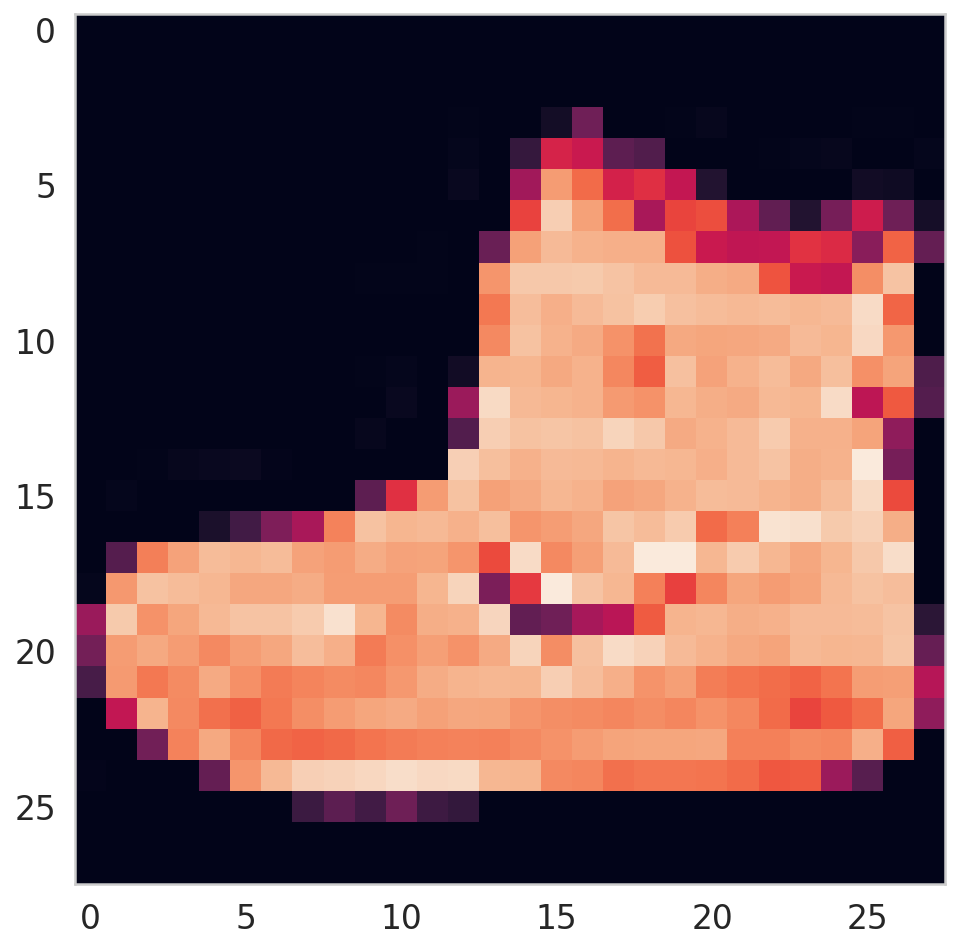

In [12]:
plt.imshow(x_train[0])
plt.grid(False)

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal','Shirt','Sneaker','Bag', 'Ankle Boot']

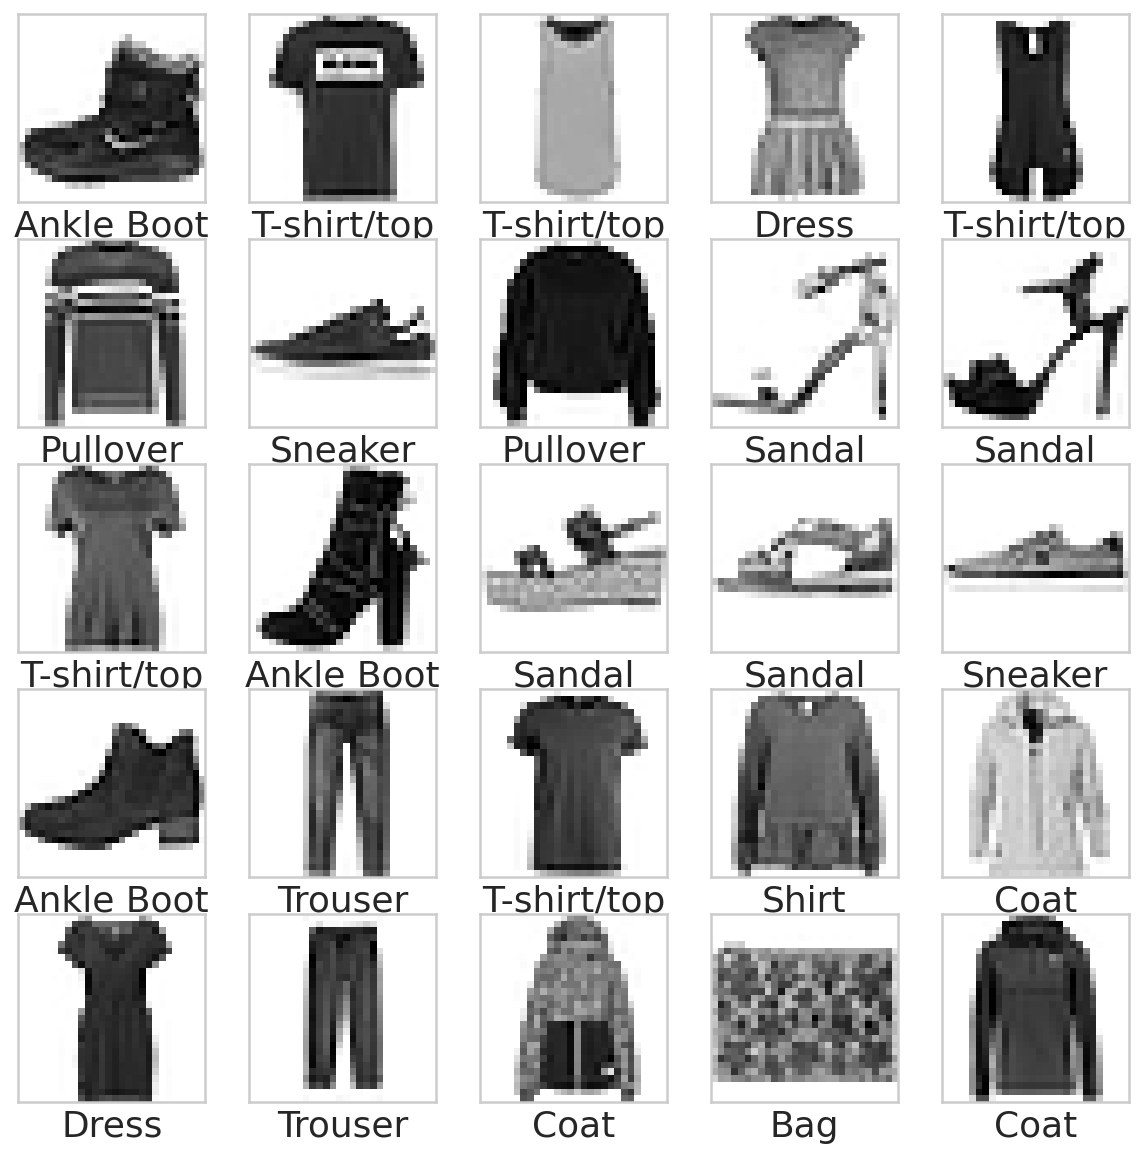

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

In [18]:
def preprocess(x, y):
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.cast(y, tf.int64)

  return x, y

def create_dataset(xs, ys, n_classes = 10):
  ys = tf.one_hot(ys, depth=n_classes)
  return tf.data.Dataset.from_tensor_slices((xs,ys)).map(preprocess).shuffle(len(ys)).batch(128)

In [19]:
train_dataset = create_dataset(x_train, y_train)
val_dataset = create_dataset(x_val, y_val)

In [24]:
model = keras.Sequential([
                          keras.layers.Reshape(target_shape=(28 * 28,) ,input_shape = (28, 28)),
                          keras.layers.Dense(units=256, activation='relu'),
                          keras.layers.Dense(units=192, activation='relu'),
                          keras.layers.Dense(units=128, activation='relu'),
                          keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer = 'adam',
              loss = tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
             )
history = model.fit(
    train_dataset.repeat(),
    epochs = 10,
    steps_per_epoch = 500,
    validation_data = val_dataset.repeat(),
    validation_steps = 2
)

Epoch 1/10
500/500 [==============================] - 8s 12ms/step - loss: 0.6605 - accuracy: 0.7723 - val_loss: 0.3860 - val_accuracy: 0.8398
Epoch 2/10
500/500 [==============================] - 5s 11ms/step - loss: 0.3692 - accuracy: 0.8660 - val_loss: 0.3554 - val_accuracy: 0.8750
Epoch 3/10
500/500 [==============================] - 5s 11ms/step - loss: 0.3270 - accuracy: 0.8785 - val_loss: 0.3067 - val_accuracy: 0.8945
Epoch 4/10
500/500 [==============================] - 5s 11ms/step - loss: 0.2989 - accuracy: 0.8872 - val_loss: 0.3378 - val_accuracy: 0.9102
Epoch 5/10
500/500 [==============================] - 6s 11ms/step - loss: 0.2794 - accuracy: 0.8964 - val_loss: 0.2736 - val_accuracy: 0.8984
Epoch 6/10
500/500 [==============================] - 5s 11ms/step - loss: 0.2674 - accuracy: 0.8995 - val_loss: 0.2498 - val_accuracy: 0.9219
Epoch 7/10
500/500 [==============================] - 5s 11ms/step - loss: 0.2580 - accuracy: 0.9014 - val_loss: 0.2864 - val_accuracy: 0.9023

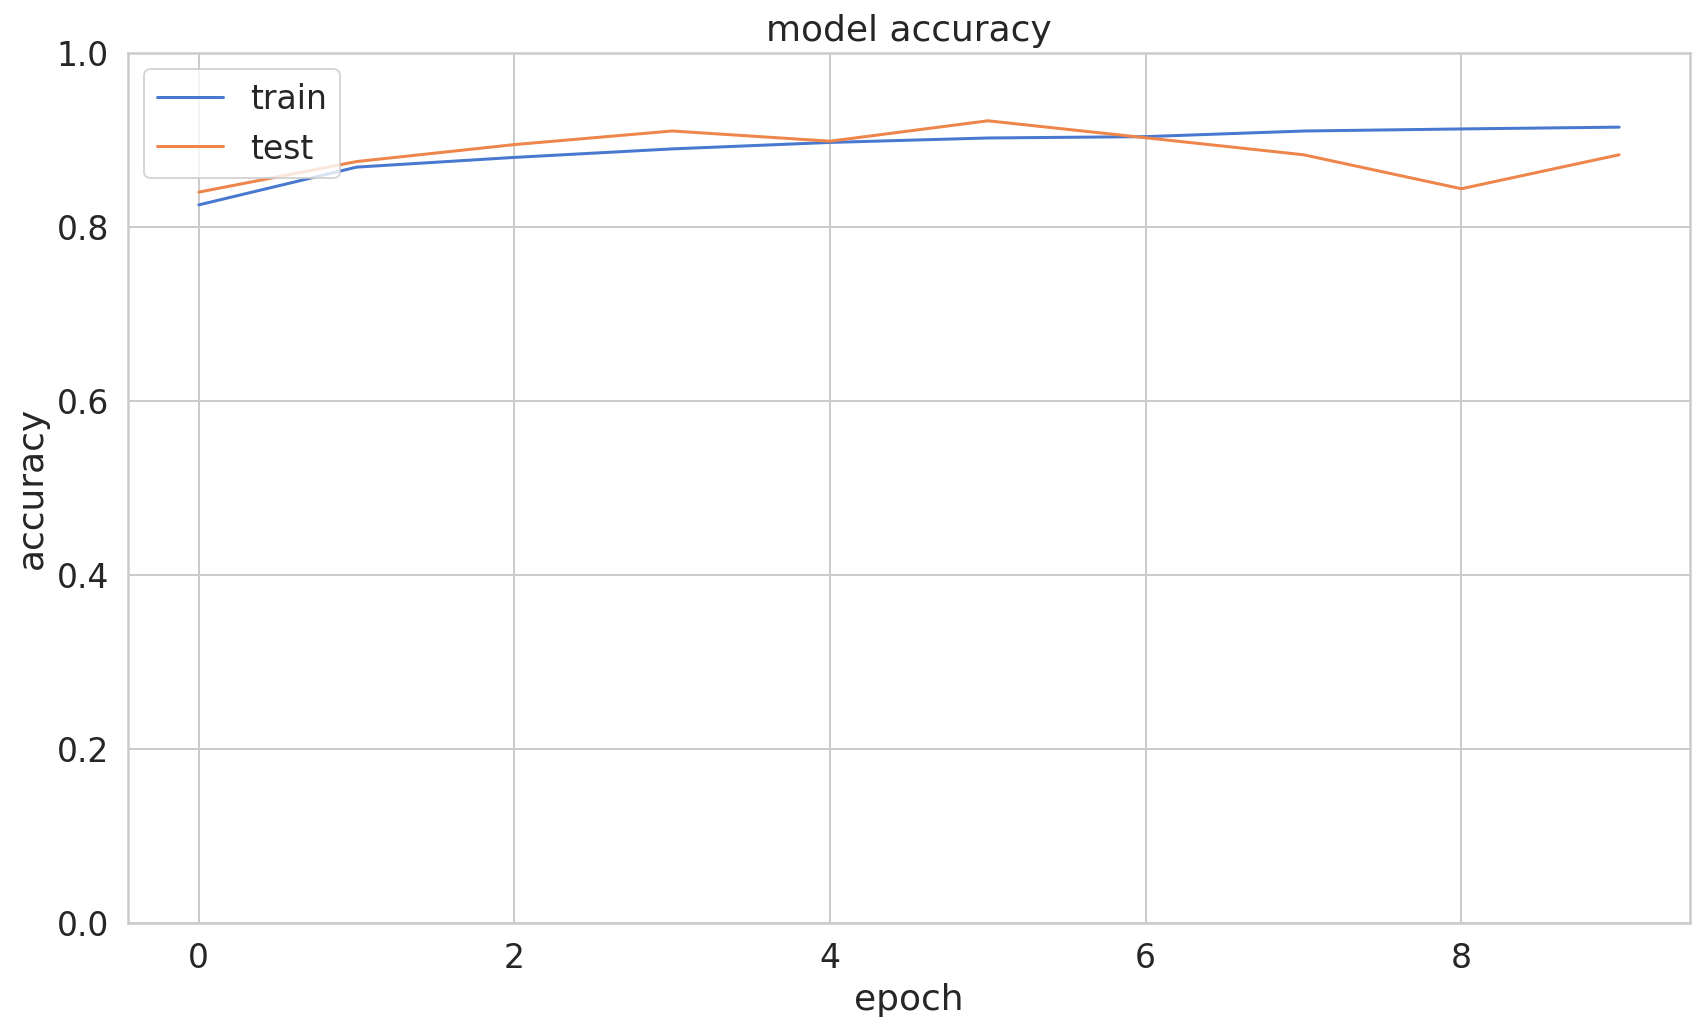

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0,1))
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

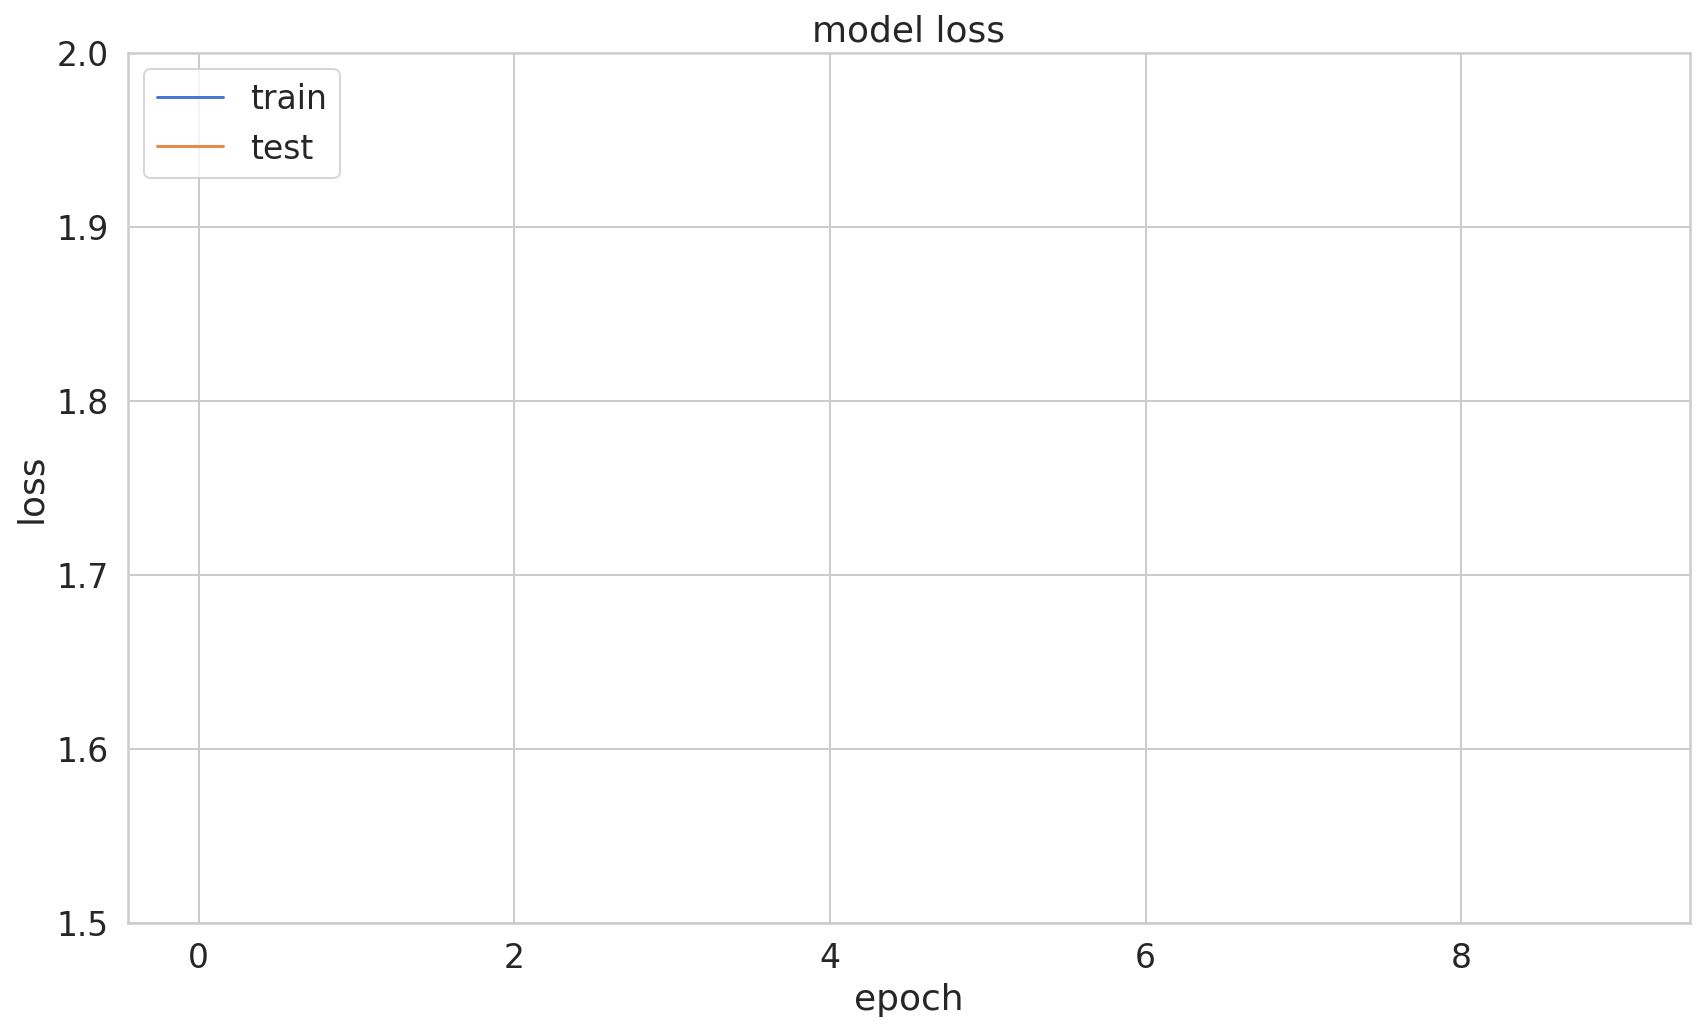

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((1.5,2))
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [29]:
predictions = model.predict(val_dataset)

In [30]:
predictions[0]

array([6.1202645e-06, 2.2730674e-07, 2.8770393e-01, 5.2018449e-06,
       7.1075481e-01, 4.4993169e-09, 1.5292675e-03, 1.3279178e-08,
       4.6198070e-07, 5.0154272e-09], dtype=float32)

In [31]:
np.argmax(predictions[0])

4

In [34]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel('Predicted: {} {:2.0f}% (True: {})'.format(class_names[predicted_label],
                                                        100 * np.max(predictions_array),
                                                        class_names[true_label]),
                                                        color = color)

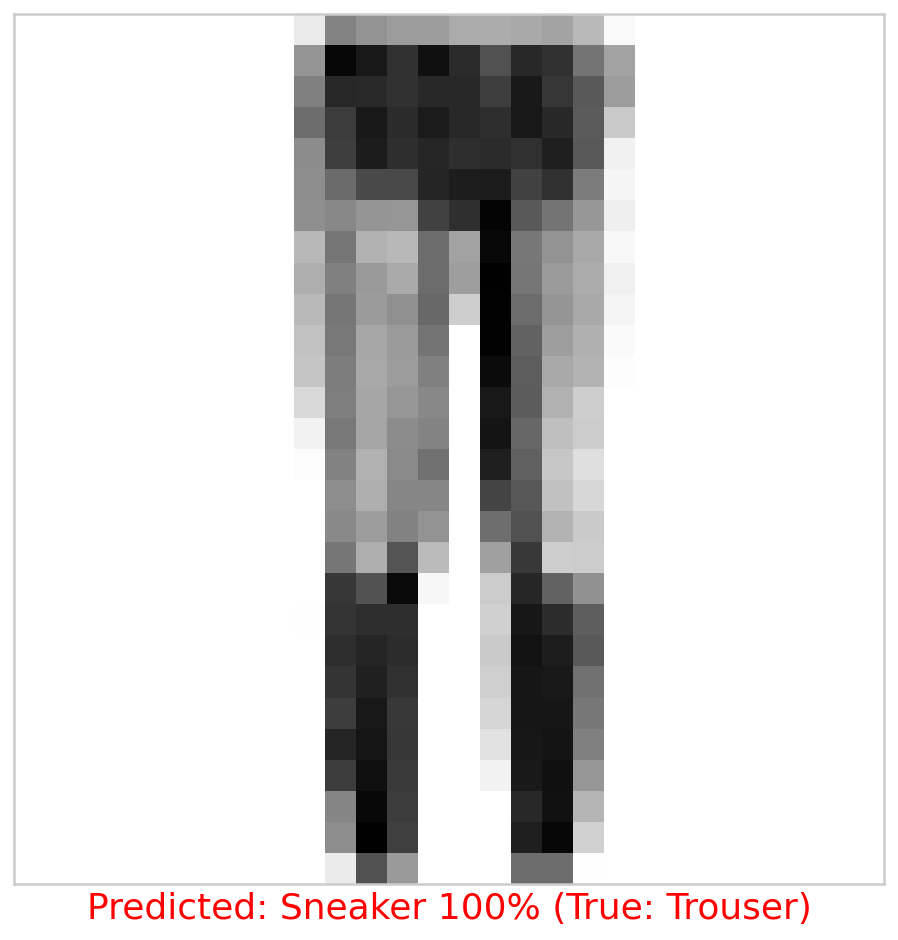

In [38]:
i = 3
plot_image(i, predictions, y_val, x_val)